# CS416 Optimisation Methods (Coursework assignment 1)

# Task-1: Linear Regression

**Task 1.1** Provide objective function for linear regression minimising the sum of squared errors.






Let $(x_i,y_i)$ be pairs of points $x_i\in\mathbb{R}^d, y_i\in\mathbb{R}$. Let $w$ be vector of weights $\in\mathbb{R}^d$. Let $b$ be bias $\in\mathbb{R}$.

Want to find $w, b$ such that we minimise the difference between the predicted value $\hat{y_i} = w^T x_i + b$ and the actual value $y_i$.

Therefore want to minimise the following function:

$=\sum_{i=1}^{n} (\hat{y_i} - y_i)^2$

Which is equivalent to:

$=\sum_{i=1}^{n} (w^T x_i + b - y_i)^2$

**Task 1.2** Write a python method “linear_regression_GD” that takes as input an n x d matrix **X** containing the feature vectors for all observations, an n-dimensional vector **y** containing  all the targets and learning rate. The method should implement gradient descent (GD) optimization to find **w** and b that minimize the sum of squared errors between the observed target and the output produced by the model. The method should return **w** and b.

In [12]:
import numpy as np

def linear_regression_GD(X, y, alpha):
    
    n, d = X.shape
    
    #start from weights and biases initialised to 0
    w = np.zeros((1, d))
    b = 0
    
    objectiveHistory = [] #recording of objective function (sum of squared errors, a.k.a. SSE), used to plot graph
    
    for i in range(1000):
        #y_pred = w^Tx + b
        y_pred = np.dot(w, X.T) + b
        
        #dSSE/dw = average of -2 * x_i * (y_i - y_pred) for all points (x_i, y_i)
        y_diff = y.T - y_pred; #y_i - y_pred
        dw = -2 * (1/n) * np.dot(y_diff, X)

        #dSSE/db = average of -2 * (y_i - y_pred) for all points (x_i, y_i)
        db= -2 * (1/n) * np.sum(y_diff)
                
        #update weights and bias using gradient descent learning rate alpha
        w -= alpha * dw
        b -= alpha * db
        
        objectiveHistory.append(np.sum(y_diff*y_diff)) #objective function is sum of squared errors, SSE
        
    #get and add final objective function value to the history
    y_pred = np.dot(w, X.T) + b
    y_diff = y.T - y_pred;
    objectiveHistory.append(np.sum(y_diff*y_diff))

    return w, b, objectiveHistory
   

**Task 1.3** You are provided with four csv files: “X_train.csv”, “y_train.csv”, “X_test.csv”, “y_test.csv”.  Load data from the files as given below. Use your implementation in linear_regression_GD to fit a model using X_train and y_train. Find the [mean squared error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) and [spearman correlation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) between model estimates and true targets in y_test.

Weights: [[ 2.16449358e-02  4.57873586e-02 -2.00975134e-02 -1.23561158e-02
   7.14833368e-02  4.30237446e-02  1.18296201e+01  3.93986852e-03
   4.49758137e-02  3.98084313e-02  1.10495984e-02  3.33575436e-02
   1.07944502e-02  3.29963479e-02  5.32572713e-02 -1.17818057e+01
  -1.65259979e+00  1.41442828e-02  6.10920024e+00 -9.16631513e-03
   3.29467369e-02  9.15219029e+00 -3.06696455e+00 -1.26828371e+01
   2.24754685e-02  4.99613910e-02 -6.64826452e+00 -1.07274274e+00
   2.18321049e-02  3.24246137e-02  1.42204449e-02  4.55824455e-02
   5.94566424e-02  2.43390259e-03  1.02442762e+00 -1.44513103e+00
  -1.93927559e+00 -7.95530867e-05  6.00194602e-02  1.08255366e-02
  -2.85459321e+00  7.30339690e+00  3.34134965e-02  8.77510200e-03
   9.61606267e+00  1.21573916e-02  1.13649903e-02  4.64089426e-02
  -2.56513204e-03  5.09305365e-02]]
Maximum Weight: 11.829620067088998
Bias: 0.07613440843403002
MSE: 1.2707061250564042
Spearman Coeff: 0.9998897728787947


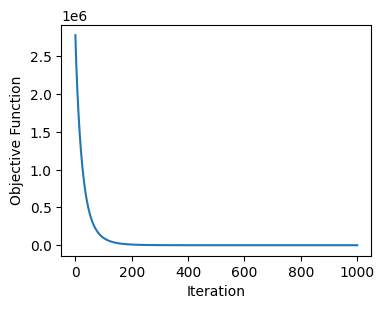

In [13]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
import os
from scipy.stats import spearmanr #use library to calculate spearman coefficient

#get the data directory
current_directory = os.getcwd()
data_directory = current_directory + '\\data\\'

#get training and test data
X_train=genfromtxt(data_directory + 'X_train.csv', delimiter=',')
X_test=genfromtxt(data_directory + 'X_test.csv', delimiter=',')
y_train=genfromtxt(data_directory + 'y_train.csv', delimiter=',')
y_test=genfromtxt(data_directory + 'y_test.csv', delimiter=',')

#function for getting MSE (mean squared error = average of SSE) and spearman coefficient.
#spearman coefficient measures how well the data is correlated in term of the rank of each point vs its predicted point.
def getTestCoeffs(X, y, w, b):  
    y_pred = np.dot(w, X.T) + b
    y_diff = y.T - y_pred
    n = len(y)
    MSE = 1/n * np.sum(y_diff * y_diff)
    spearman, _ = spearmanr(y, y_pred[0])
    return MSE, spearman

#plot objective function vs GD iteration
def plotObjectiveHistory(objectiveValues):
    indices = np.arange(len(objectiveValues))
    
    plt.figure(figsize=(4, 3))
    plt.xlabel('Iteration')
    plt.ylabel('Objective Function')
    plt.plot(indices, objectiveValues)

#any significantly bigger alpha, training diverges
w,b,SSEhistory = linear_regression_GD(X_train, y_train, 0.0009)

testMSE, testSpearman = getTestCoeffs(X_test, y_test, w, b)
print("Weights:", w)
print("Maximum Weight:", np.max(w))
print("Bias:", b)
print("MSE:", testMSE)
print("Spearman Coeff:", testSpearman)

plotObjectiveHistory(SSEhistory)

# Task-2: L2-Regularised Linear Regression

**Task 2.1**
Add L2 regularisation in the objective function from 1.1. Provide the modified objective function below.

A regularisation term keeps the weights of the output low by penalising high values. The L2 regularisation term penalises weights as function of their size squared and a $\lambda$ constant so the strength of the regularisation can be adjusted.

L2 regularisation term: 

$=\frac{\lambda}{2}\sum_{i=0}^{n}w_i^2$

Therefore the objection function is:

$=\sum_{i=1}^{n} (w^T x_i + b - y_i)^2 + \frac{\lambda}{2}\sum_{i=0}^{n}w_i^2$

**Task 2.2** Based on the above formulation, write a python method “linear_regression_GD_L2” that takes as input an nxd matrix **X** containing the feature vectors for all observations, an n-dimensional vector **y** containing  all the targets, regularization weight lambda and learning rate. The method should implement gradient descent optimization to find w and b that minimize the regularized objective function.

In [15]:
def linear_regression_GD_L2(X, y, alpha, lmbda):
    
    n, d = X.shape
    
    #start from weights and biases initialised to 0
    w = np.zeros((1, d))
    b = 0
    
    objectiveHistory = [] #recording of objective function stated in markdown above
    
    for i in range(1000):
        #y_pred = w^Tx + b
        y_pred = np.dot(w, X.T) + b
        
        #can find dw in two parts since derivation acts individual on parts of a sum
        
        #find initial dw (dSSE/dw) in same way as previous task
        y_diff = y.T - y_pred;
        dw = -2 * (1/n) * np.dot(y_diff, X)
        
        #add regularisation term = lambda * w = d/dw(lamba/2*(sum of weights squared))
        dw += lmbda * w

        #find db in same way as previous task
        db= -2 * (1/n) * np.sum(y_diff)
                
        objectiveHistory.append(np.sum(y_diff*y_diff) + lmbda * 0.5 * np.sum(w[0]*w[0]))
            
        # Update weights and bias
        w -= alpha * dw
        b -= alpha * db
                
    #get final objective function value
    y_pred = np.dot(w, X.T) + b
    y_diff = y.T - y_pred;
    objectiveHistory.append(np.sum(y_diff*y_diff) + lmbda * 0.5 * np.sum(w[0]*w[0]))
    
    return w, b, objectiveHistory

**Task 2.3** 	Fit a model using linear_regression_GD_L2 and data from Task1.3. Find the mean squared error and spearman correlation between model_estimates and true targets in y_test. Test with different values of lambda. What is the minimum MSE you can achieve, for what value of lambda, and how does it compare with results for unregularized regression from task 1.3?

Weights: [[ 2.16449358e-02  4.57873586e-02 -2.00975134e-02 -1.23561158e-02
   7.14833368e-02  4.30237446e-02  1.18296201e+01  3.93986852e-03
   4.49758137e-02  3.98084313e-02  1.10495984e-02  3.33575436e-02
   1.07944502e-02  3.29963479e-02  5.32572713e-02 -1.17818057e+01
  -1.65259979e+00  1.41442828e-02  6.10920024e+00 -9.16631513e-03
   3.29467369e-02  9.15219029e+00 -3.06696455e+00 -1.26828371e+01
   2.24754685e-02  4.99613910e-02 -6.64826452e+00 -1.07274274e+00
   2.18321049e-02  3.24246137e-02  1.42204449e-02  4.55824455e-02
   5.94566424e-02  2.43390259e-03  1.02442762e+00 -1.44513103e+00
  -1.93927559e+00 -7.95530867e-05  6.00194602e-02  1.08255366e-02
  -2.85459321e+00  7.30339690e+00  3.34134965e-02  8.77510200e-03
   9.61606267e+00  1.21573916e-02  1.13649903e-02  4.64089426e-02
  -2.56513204e-03  5.09305365e-02]]
Maximum Weight: 11.829620067088998
Bias: 0.07613440843403002
MSE: 1.2707061250564042
Spearman Coeff: 0.9998897728787947


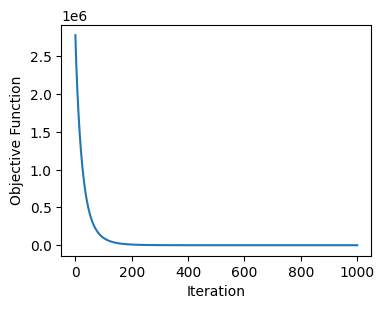

In [16]:
#any bigger alpha => code diverges
w,b,objectiveHistory = linear_regression_GD_L2(X_train, y_train, 0.0009, 0)
    
testMSE, testSpearman = getTestCoeffs(X_test, y_test, w, b)
print("Weights:", w)
print("Maximum Weight:", np.max(w))
print("Bias:", b)
print("MSE:", testMSE)
print("Spearman Coeff:", testSpearman)

plotObjectiveHistory(objectiveHistory)

Using 1000 iterations:\
\
Lambda = 0, Largest Weight = 11.83, Mean Squared Error (MSE) = 1.271\
Lambda = 0.1, Largest Weight = 11.75, MSE = 1.576\
Lambda = 1.0, Largest Weight = 11.08, MSE = 24.08\
Lambda = 5.0, Largest Weight = 8.890, MSE = 349.7\
Lambda = 10.0, Largest Weight = 7.181, MSE = 886.0\
\
Regularisation term works at the expense of the average error (MSE).

# Task-3: L1-Regularised Linear Regression
Task 3.1 Write the objective function for L1 regularized linear regression.

The L1 regularisation term mean taking the sum of the absolute values of the weights into account in the objective function. Therefore the objection function is:

$=\sum_{i=1}^{n} (w^T x_i + b - y_i)^2 + \lambda\sum_{i=0}^{n}|w_i|$

**Task 3.2** Based on your formulation, write a python method “linear_regression_SD_L1” that takes as input an nxd matrix **X** containing the feature vectors for all observations, an n-dimensional vector **y** containing  all the targets, L1 regularization weight lambda and learning rate. The method should implement subgradient descent optimization to find **w** and b that minimize the regularized objective function. Please note that L1 norm is that it is not differentiable at zero. So, instead of gradient descent, you will need to use subgradient descent for optimization.

In [5]:
def linear_regression_SD_L1(X, y, alpha, lmbda):
    
    n, d = X.shape
    
    #start from weights and biases initialised to 0
    w = np.zeros((1, d))
    b = 0
    
    objectiveHistory = [] #recording of objective function, stated in markdown above
    
    for i in range(1000):
        #y_pred = w^Tx + b
        y_pred = np.dot(w, X.T) + b
                
        #find initial dw (dSSE/dw) in same way as previous task
        y_diff = y.T - y_pred;
        dw = -2 * (1/n) * np.dot(y_diff, X) 
        
        #use lambda * sign(w) as subgradient function as actual derivative diverges at 0
        dw += (lmbda * np.sign(w))

        #find db in same way as task 1
        db= -2 * (1/n) * np.sum(y_diff)
              
        objectiveHistory.append(np.sum(y_diff*y_diff) + lmbda * np.sum(np.abs(w[0])))
            
        # Update weights and bias
        w -= alpha * dw
        b -= alpha * db
                
    #get final objective function value
    y_pred = np.dot(w, X.T) + b
    y_diff = y.T - y_pred;
    objectiveHistory.append(np.sum(y_diff*y_diff) + lmbda * np.sum(np.abs(w[0])))
    
    return w, b, objectiveHistory

**Task 3.3**	Use “linear_regression_SD_L1” to fit an L1 regularized regression model on the data provided in Task 1.3. Find the mean squared error and spearman correlation between model estimates for X_test and true targets in y_test. Test with different values of lambda. What is the minimum MSE you can achieve, for what value of lambda and how does it compare with results for unregularized and L2 regularized regression. How much feature reduction were you able to achieve while keeping the MSE minimum?

Weights: [[-2.92133691e-01 -2.20025906e-01 -2.70145084e-01 -2.42170270e-01
  -7.30399499e-02 -4.80945937e-02  8.89041746e+00 -1.81007958e-01
  -2.44431477e-01 -4.99121485e-02 -2.41874576e-01 -1.38857757e-02
  -4.10788859e-02 -2.95288521e-01 -4.03488179e-02 -1.00482492e+01
  -2.31146981e-01 -2.42787814e-01  2.79598370e+00 -8.82291266e-02
  -2.20166245e-01  7.32611604e+00 -1.03771383e+00 -1.16659653e+01
  -2.73144972e-01  7.08760013e-03 -3.90966122e+00 -2.81781032e-01
  -2.33118326e-01 -9.86819333e-02 -2.06916138e-02 -2.70256366e-01
  -2.49945833e-01 -2.34653783e-01  3.94641320e-03 -2.91933979e-01
  -2.48825547e-01 -1.12211650e-01 -2.82448884e-01 -3.17386454e-02
  -5.00412751e-01  4.33499556e+00 -2.51776641e-01 -2.19432788e-01
   7.16902712e+00 -2.55788700e-01 -1.39886108e-01 -2.43477950e-01
  -2.49752155e-01  6.44889111e-03]]
Maximum Weight: 8.890417462965718
Bias: -0.3956200729710277
MSE: 1456.0791524634778
Spearman Coeff: 0.9790959598204364


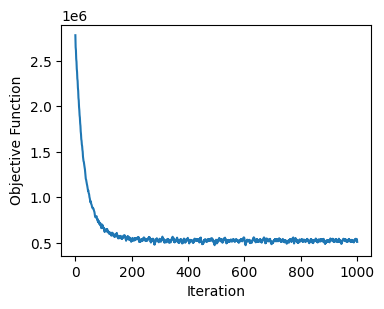

In [6]:
#any bigger alpha => code diverges
w,b,objectiveHistory = linear_regression_SD_L1(X_train, y_train, 0.0009, 39.92)

testMSE, testSpearman = getTestCoeffs(X_test, y_test, w, b)
print("Weights:", w)
print("Maximum Weight:", np.max(w))
print("Bias:", b)
print("MSE:", testMSE)
print("Spearman Coeff:", testSpearman)

plotObjectiveHistory(objectiveHistory)

Using 1000 iterations:\
\
Lambda = 0, Largest Weight = 11.83, Mean Squared Error (MSE) = 1.271\
Lambda = 1.0, largest weight = 11.80, MSE = 1.883\
Lambda = 5.0, largest weight = 11.48, MSE = 23.53\
Lambda = 10.0, largest weight = 11.09, MSE = 91.20\
Lambda = 39.92, largest weight = 8.890, MSE = 1456\
\
Compared to the L2 norm test results it took a larger lambda to similarly reduce the largest weight. Like the previous task, a small reduction in the largest weight caused a large increase in the MSE. A lambda value of 39.92 was selected to match the largest weight to the L2 norm test with lambda = 5.0. There was a bigger increase in MSE than in the L2 norm test. I would assume this is because the L1 norm isn't as selective at punishing extreme weight values as the L2 norm leading to more alterations being done to the smaller weights therefore resulting in a larger MSE.

# Task-4: L2-Regularised Ranking
**Task 4.1** Write the objective function for L2 regularised ranking as explained in the assignment description pdf.

The assignment gives a function $l(y_i, y_j, \hat{y_i}, \hat{y_j}) = (y_i - y_j)max\{0,1-(\hat{y_i}-\hat{y_j})\}$ that returns a positive value if a pair of points are ranked in the wrong order (only applicable for when $y_i > y_j$). To construct an objective function we will have to run function this on every applicable pair of points and predicted points and sum the result.

$=\sum_{i,j \in [1,n], i < j, y_i > y_j}^{n} l(y_i, y_j, \hat{y_i}, \hat{y_j}) + \frac{\lambda}{2}\sum_{i=0}^{n}w_i^2$

where

$l(y_i, y_j, \hat{y_i}, \hat{y_j}) = (y_i - y_j)max\{0,1-(\hat{y_i}-\hat{y_j})\}$

note there is a L2-regularisation term as the assignment asks for a L2 regularised ranking.

**Task 4.2** 	Write a python method called “linear_ranking_SD” that takes as input an nxd matrix **X** containing the feature vectors for all observations, an n-dimensional vector **y** containing  all the targets, regularization weight lambda and learning rate. The method should implement subgradient descent optimization to find **w** and b that minimize the regularized objective function from 4.1.

In [21]:
#separate objective function as it is complex
def objectiveFunc(y, y_pred, w, lmbda):
    #create I and J such that (I,J) is every coordinate of a len(y) x len(y) matrix
    I = np.repeat(np.arange(0, len(y)), len(y))
    J = np.tile(np.arange(0, len(y)), len(y))

    mask = (y[I] > y[J]) #y_i > y_j
    #sum of l(.,.,.,.)
    value = np.sum(mask * (y[I] - y[J]) * (1 - (y_pred[0, I] - y_pred[0, J])) * ((1 - (y_pred[0, I] - y_pred[0, J])) > 0))
    
    #L2 regularised term
    value += lmbda * 0.5 * np.sum(w[0] * w[0])
    
    return value

def linear_regression_SD(X, y, alpha, lmbda):
    
    n, d = X.shape
    
    #start from all initialised to 0
    w = np.zeros((1, d))
    b = 0
    
    objectiveHistory = [] #recording of objective function stated in markdown above
    
    for i in range(50):
        #y_pred = w^Tx + b
        y_pred = np.dot(w, X.T) + b

        objectiveHistory.append(objectiveFunc(y, y_pred, w, lmbda))

        #NON VECTORISED VERSION, TOO SLOW -------------------------
        #differentiate wrt w_k
        #dw = np.zeros(w.shape)
        #for k in range(d):
            #for J in range(n):
                #for I in range(J): #all pairs of I and J
                    ##dw[0][k] += -(y[I] - y[J]) * ((1-(y_pred[0][I] - y_pred[0][J])) > 0) * X[I][k]
                    #dw[0][k] += (y[I] - y[J]) * ((1-(y_pred[0][I] - y_pred[0][J])) > 0) * X[J][k]
        #-----------------------------------------------------------
                    
        #vectorised computation of dw
        #create I and J such that (I,J) is every coordinate of a len(y) x len(y) matrix
        I = np.repeat(np.arange(0, len(y)), len(y))
        J = np.tile(np.arange(0, len(y)), len(y))
        
        #compute the operation for every pair of indices
        dw = np.zeros((1, d))
        mask = (y[I] > y[J]).reshape(-1,1) #only use pairs where y_i > y_j
        #derivate has two terms as y_pred depends on w and there are two instances of y_pred in objective function
        dw += np.sum(mask * (y[J] - y[I]).reshape(-1,1) * ((1 - (y_pred[0, I] - y_pred[0, J])) > 0).reshape(-1,1) * X[I], axis = 0)
        dw += np.sum(mask * (y[I] - y[J]).reshape(-1,1) * ((1 - (y_pred[0, I] - y_pred[0, J])) > 0).reshape(-1,1) * X[J], axis = 0)
        
        #L2 regularization term
        dw += lmbda * w

        #change in bias irrelevant to objective function after doing the maths
        db= 0
        
        # Update weights and bias
        w -= alpha * dw
        b -= alpha * db
                        
    #get final objective function value
    y_pred = np.dot(w, X.T) + b
    objectiveHistory.append(objectiveFunc(y, y_pred, w, lmbda))
    
    return w, b, objectiveHistory

**Task 4.3** Use “linear_ranking_SD” to fit the ranking model on the data provided in Task 1.3. Find the mean squared error and spearman correlation between model estimates for X_test and true targets in y_test. Test with different values of lambda. What is the maximum Spearman’s correlation you can achieve, for what value of lambda and how does it compare with results for unregularized, L1 and L2 regularized regression models.

Weights: [[-3.32910418e-01  1.19172409e-01  2.14834576e-01 -2.93872473e-01
   4.54709869e-01  4.35913366e-01  1.35561646e+01  1.41443121e-02
   1.22067760e-01  4.05238951e-01 -5.31719087e-01  4.27407916e-01
  -1.51022616e-01 -9.37797674e-02  4.06714929e-01 -1.42363432e+01
  -1.99450272e+00 -2.91217655e-01  6.75422960e+00  5.46636393e-02
  -3.85422275e-02  1.15249667e+01 -3.63453757e+00 -1.57154168e+01
  -4.89607723e-01  4.22406943e-01 -7.81710450e+00 -2.03787313e+00
  -2.34439606e-01  3.49894454e-01  2.41552400e-01 -1.63549179e-01
  -1.52781843e-01 -3.85550742e-01  8.93424120e-01 -1.12132560e+00
  -2.49334312e+00  3.19816792e-01 -3.56194304e-01  8.38664186e-01
  -3.12078998e+00  8.07041698e+00 -2.36194230e-01 -7.13626203e-02
   1.17176811e+01 -2.42645373e-01  2.94362535e-01 -5.63817865e-01
  -2.09791350e-01  4.20747221e-01]]
Maximum Weight: 13.556164588116179
Bias: 0.0
MSE: 366.6536444928705
Spearman Coeff: 0.9960922707675897


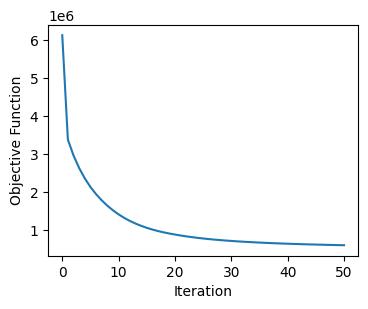

In [31]:
#any bigger alpha => code diverges
w,b,objectiveHistory = linear_regression_SD(X_train, y_train, 0.000001, 1000)

testMSE, testSpearman = getTestCoeffs(X_test, y_test, w, b)
print("Weights:", w)
print("Maximum Weight:", np.max(w))
print("Bias:", b)
print("MSE:", testMSE)
print("Spearman Coeff:", testSpearman)

plotObjectiveHistory(objectiveHistory)

Below are the results varying lambda after 50 iterations. Had to do 50 instead of 1000 because this algorithm is much slower to run.\
\
Lambda = 0, Spearman Coeff. = 0.99597, largest Weight = 14.22, MSE = 544.6\
Lambda = 100, Spearman Coeff. = 0.99600, largest Weight = 14.15, MSE = 524.2\
Lambda = 1000, Spearman Coeff. = 0.99609, largest Weight = 13.56, MSE = 366.7\
Lambda = 10000, Spearman Coeff. = 0.99711, largest Weight = 8.774, MSE = 443.8\
Lambda = 100000, Spearman Coeff. = 0.99983, largest Weight = 1.028, MSE = 5438\
Higher lambda diverged.\
\
Surprisingly, increasing lambda increased the final Spearman coefficient despite the objective function with lambda = 0 optimising only for the correct rank of all the points. I believe this is because you can retain the correct ordering of prediction points whilst decreasing all the weights by a constant factor. The higher lambda pushes for the weights to become very small and since $dw$ does not depend on $\hat{y_i}$ the changes in weight values are relatively bigger. This means that higher lambda effectively increases the learning rate until it diverges which is why the highest non-diverging lambda gives the best Spearman coefficient. 